In [3]:
import numpy as np


In [4]:
import matplotlib.pyplot as plt
import pandas as pd

In [32]:
import tensorflow as tf

In [5]:
import seaborn as sns


In [6]:
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
%matplotlib inline

In [2]:
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

#### Household Power Consumption Dataset

In [8]:
df=pd.read_csv('household_power_consumption.txt', delimiter=';')

In [9]:
df.shape

(2075259, 9)

In [10]:
df.head(5)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [11]:
df['date_time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


In [12]:
df.head(5)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date_time
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00


In [13]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df = df.dropna(subset=['Global_active_power'])

In [14]:
df.head(5)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date_time
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00


In [15]:
df['date_time']=pd.to_datetime(df['date_time']) 
df['year'] = df['date_time'].apply(lambda x: x.year)
df['quarter'] = df['date_time'].apply(lambda x: x.quarter)
df['month'] = df['date_time'].apply(lambda x: x.month)
df['day'] = df['date_time'].apply(lambda x: x.day)

In [16]:
df.head(5)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date_time,year,quarter,month,day
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00,2006,4,12,16
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00,2006,4,12,16
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00,2006,4,12,16
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00,2006,4,12,16
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00,2006,4,12,16


In [17]:
df=df.loc[:,['date_time','Global_active_power', 'year','quarter','month','day']]
df.sort_values('date_time', inplace=True, ascending=True)
df = df.reset_index(drop=True)

In [18]:
df.head(5)

,date_time,Global_active_power,year,quarter,month,day
0,2006-12-16 17:24:00,4.216,2006,4,12,16
1,2006-12-16 17:25:00,5.360,2006,4,12,16
2,2006-12-16 17:26:00,5.374,2006,4,12,16
3,2006-12-16 17:27:00,5.388,2006,4,12,16
4,2006-12-16 17:28:00,3.666,2006,4,12,16


In [19]:
df["weekday"]=df.apply(lambda row: row["date_time"].weekday(),axis=1)
df["weekday"] = (df["weekday"] < 5).astype(int)
print(df.shape)
print(df.date_time.min())
print(df.date_time.max())
df.tail(5)

(2049280, 7)
2006-12-16 17:24:00
2010-11-26 21:02:00


,date_time,Global_active_power,year,quarter,month,day,weekday
2049275,2010-11-26 20:58:00,0.946,2010,4,11,26,1
2049276,2010-11-26 20:59:00,0.944,2010,4,11,26,1
2049277,2010-11-26 21:00:00,0.938,2010,4,11,26,1
2049278,2010-11-26 21:01:00,0.934,2010,4,11,26,1
2049279,2010-11-26 21:02:00,0.932,2010,4,11,26,1


In [20]:
print('The time series starts from: ', df.date_time.min())
print('The time series ends on: ', df.date_time.max())

The time series starts from:  2006-12-16 17:24:00
The time series ends on:  2010-11-26 21:02:00


In [21]:
df1 = df.loc[:, ['date_time', 'Global_active_power']]

df1.set_index('date_time', inplace=True)

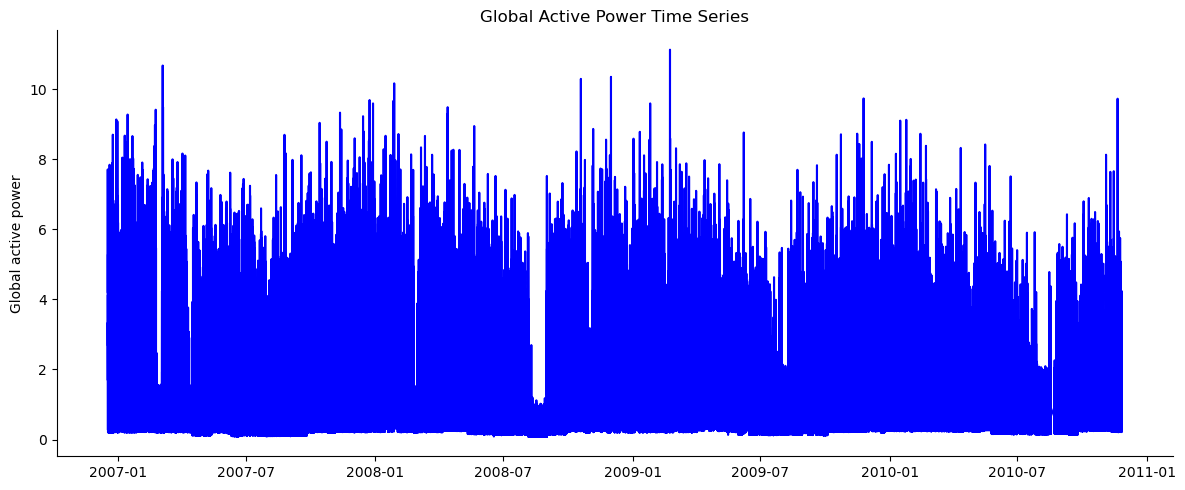

In [20]:
plt.figure(figsize=(12, 5))
plt.plot(df1, label="Global Active Power", color="b")

plt.ylabel("Global active power")
plt.title("Global Active Power Time Series")
plt.legend().set_visible(False)
plt.tight_layout()

sns.despine(top=True)

plt.show()


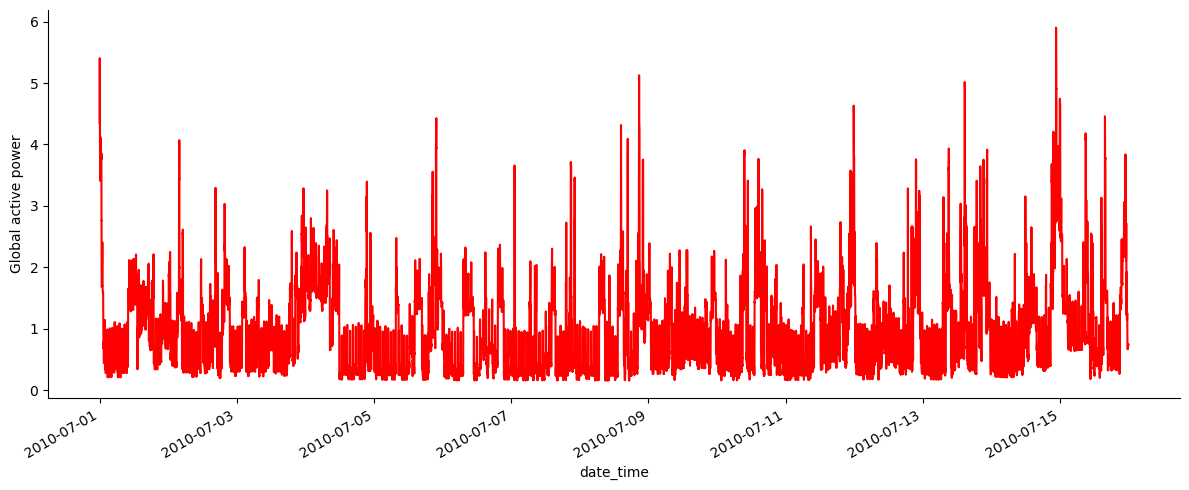

In [21]:
df2=df1[(df1.index>='2010-07-01') & (df1.index<'2010-7-16')]
df2.plot(figsize=(12,5),color='r');
plt.ylabel('Global active power')
plt.legend().set_visible(False)
plt.tight_layout()
sns.despine(top=True)
plt.show();

#### Box plot of yearly Vs. quarterly Global active power

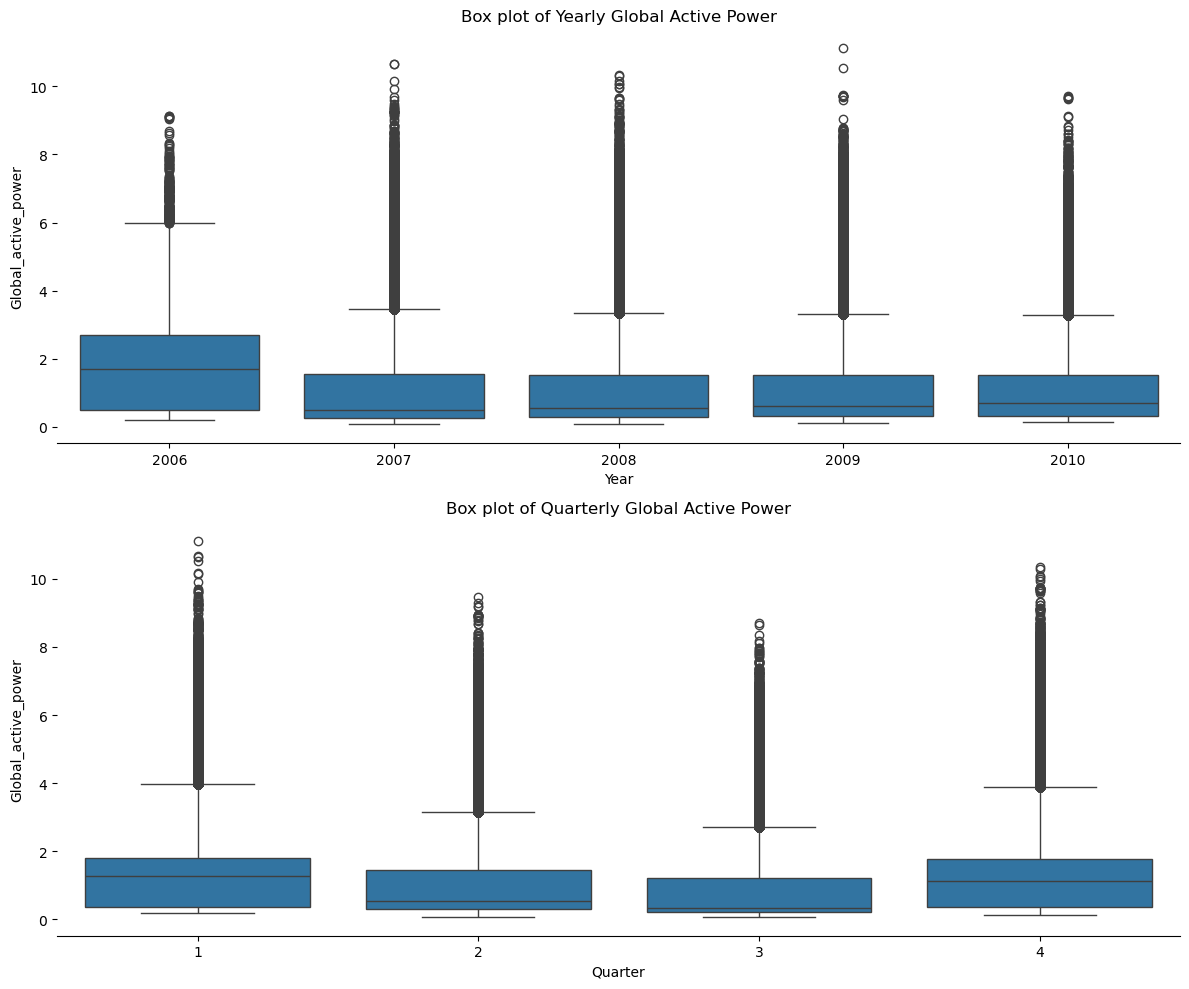

In [22]:
plt.figure(figsize=(12, 10))

plt.subplot(2,1,1)
sns.boxplot(x="year", y="Global_active_power", data=df)
plt.xlabel("Year")
plt.title("Box plot of Yearly Global Active Power")
sns.despine(left=True)

plt.subplot(2, 1, 2)
sns.boxplot(x="quarter", y="Global_active_power", data=df)
plt.xlabel("Quarter")
plt.title("Box plot of Quarterly Global Active Power")
sns.despine(left=True)

plt.subplots_adjust(wspace=0.2)
plt.tight_layout()
plt.show()


#### Global Active Power Distribution

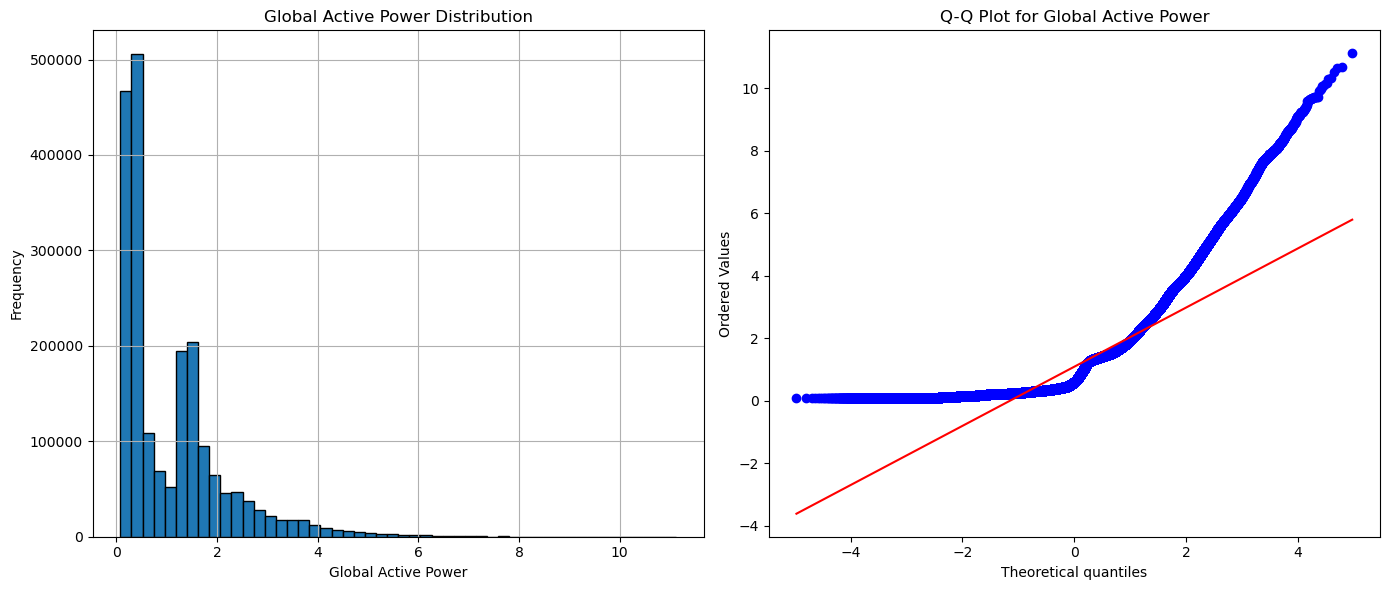

                         count      mean       std    min    25%    50%  \
Global_active_power  2049280.0  1.091615  1.057294  0.076  0.308  0.602   

                       75%     max  
Global_active_power  1.528  11.122  


In [23]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
df['Global_active_power'].hist(bins=50, edgecolor='black')
plt.title('Global Active Power Distribution')
plt.xlabel('Global Active Power')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
stats.probplot(df['Global_active_power'].dropna(), plot=plt)  # Drop NaN values if any
plt.title('Q-Q Plot for Global Active Power')

plt.tight_layout()
plt.show()

df1_summary = df1.describe().T
print(df1_summary)


#### Average Global Active Power resampled over Day, Week, Month, Quarter and Year

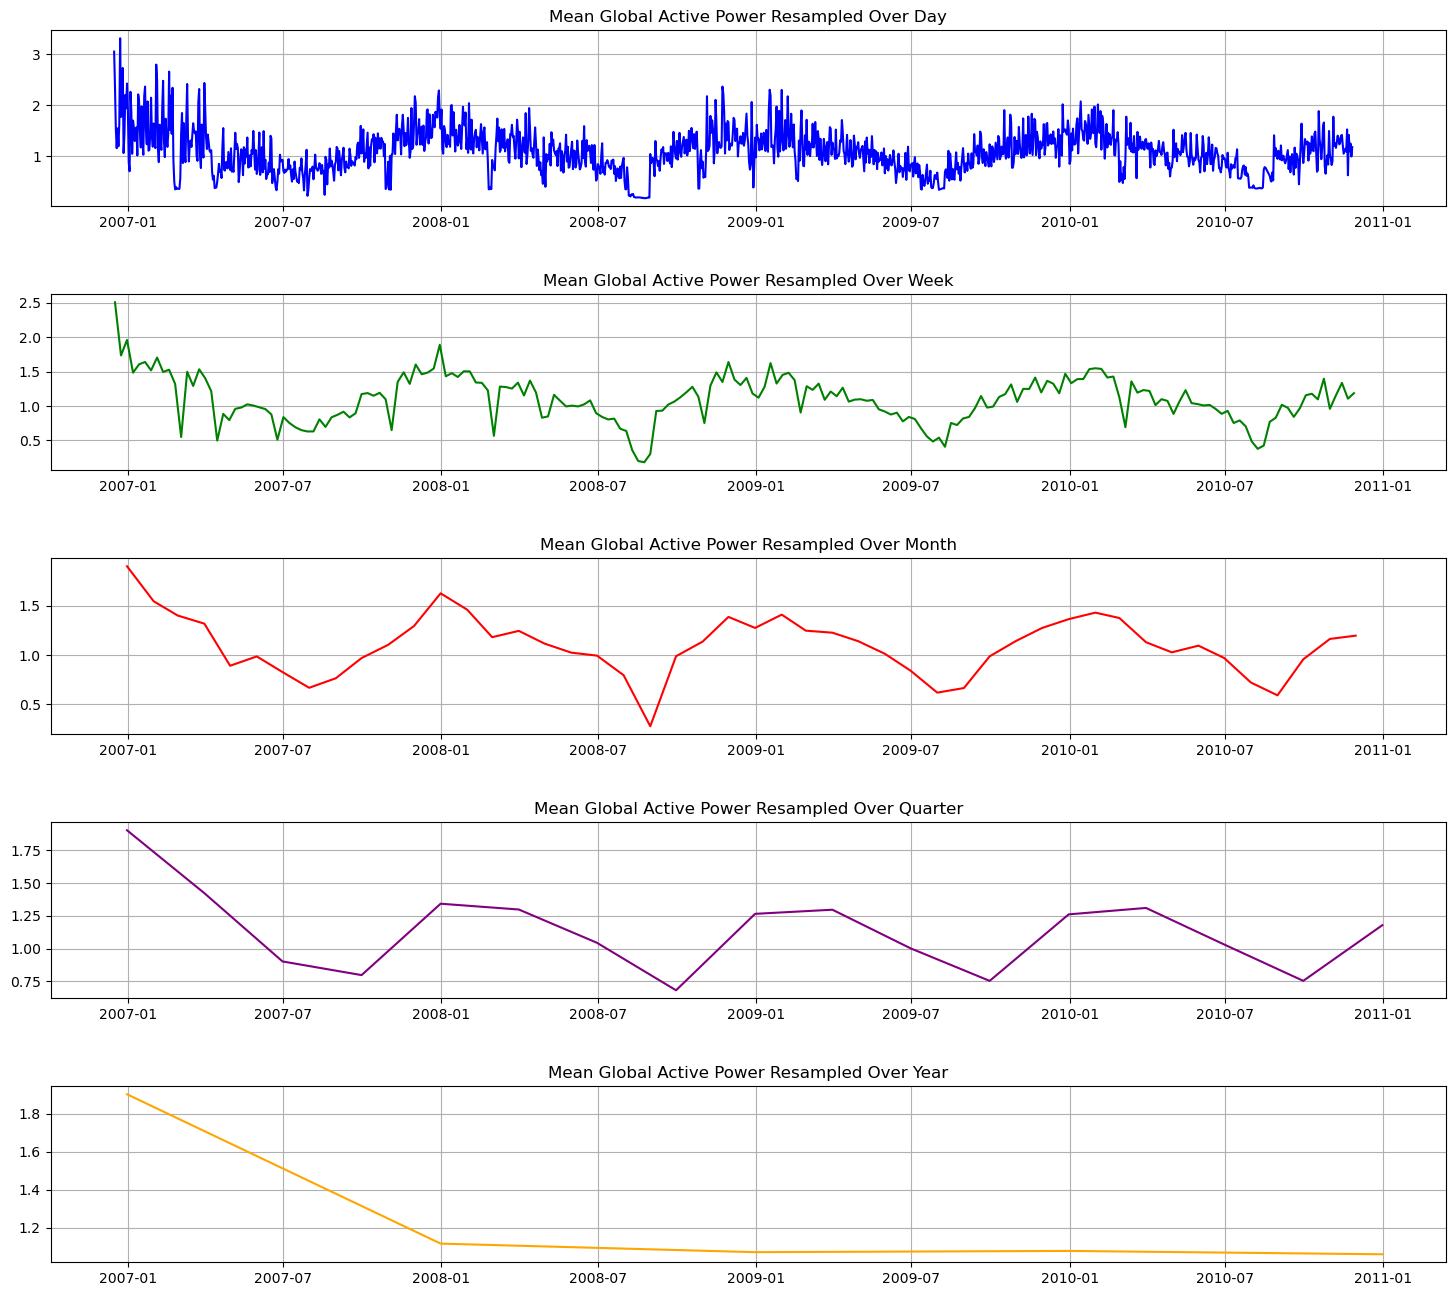

In [24]:
df1.index = pd.to_datetime(df1.index)
# Create the figure
fig = plt.figure(figsize=(18, 16))
fig.subplots_adjust(hspace=0.5)

ax1 = fig.add_subplot(5, 1, 1)
ax1.plot(df1['Global_active_power'].resample('D').mean().dropna(), color='b', linewidth=1.5)
ax1.set_title('Mean Global Active Power Resampled Over Day')
ax1.tick_params(axis='both', which='major')
ax1.grid(True)

ax2 = fig.add_subplot(5, 1, 2, sharex=ax1)
ax2.plot(df1['Global_active_power'].resample('W').mean().dropna(), color='g', linewidth=1.5)
ax2.set_title('Mean Global Active Power Resampled Over Week')
ax2.tick_params(axis='both', which='major')
ax2.grid(True)

ax3 = fig.add_subplot(5, 1, 3, sharex=ax1)
ax3.plot(df1['Global_active_power'].resample('M').mean().dropna(), color='r', linewidth=1.5)
ax3.set_title('Mean Global Active Power Resampled Over Month')
ax3.tick_params(axis='both', which='major')
ax3.grid(True)

ax4 = fig.add_subplot(5, 1, 4, sharex=ax1)
ax4.plot(df1['Global_active_power'].resample('Q').mean().dropna(), color='purple', linewidth=1.5)
ax4.set_title('Mean Global Active Power Resampled Over Quarter')
ax4.tick_params(axis='both', which='major')
ax4.grid(True)

ax5 = fig.add_subplot(5, 1, 5, sharex=ax1)
ax5.plot(df1['Global_active_power'].resample('A').mean().dropna(), color='orange', linewidth=1.5)
ax5.set_title('Mean Global Active Power Resampled Over Year')
ax5.tick_params(axis='both', which='major')
ax5.grid(True)

plt.show()


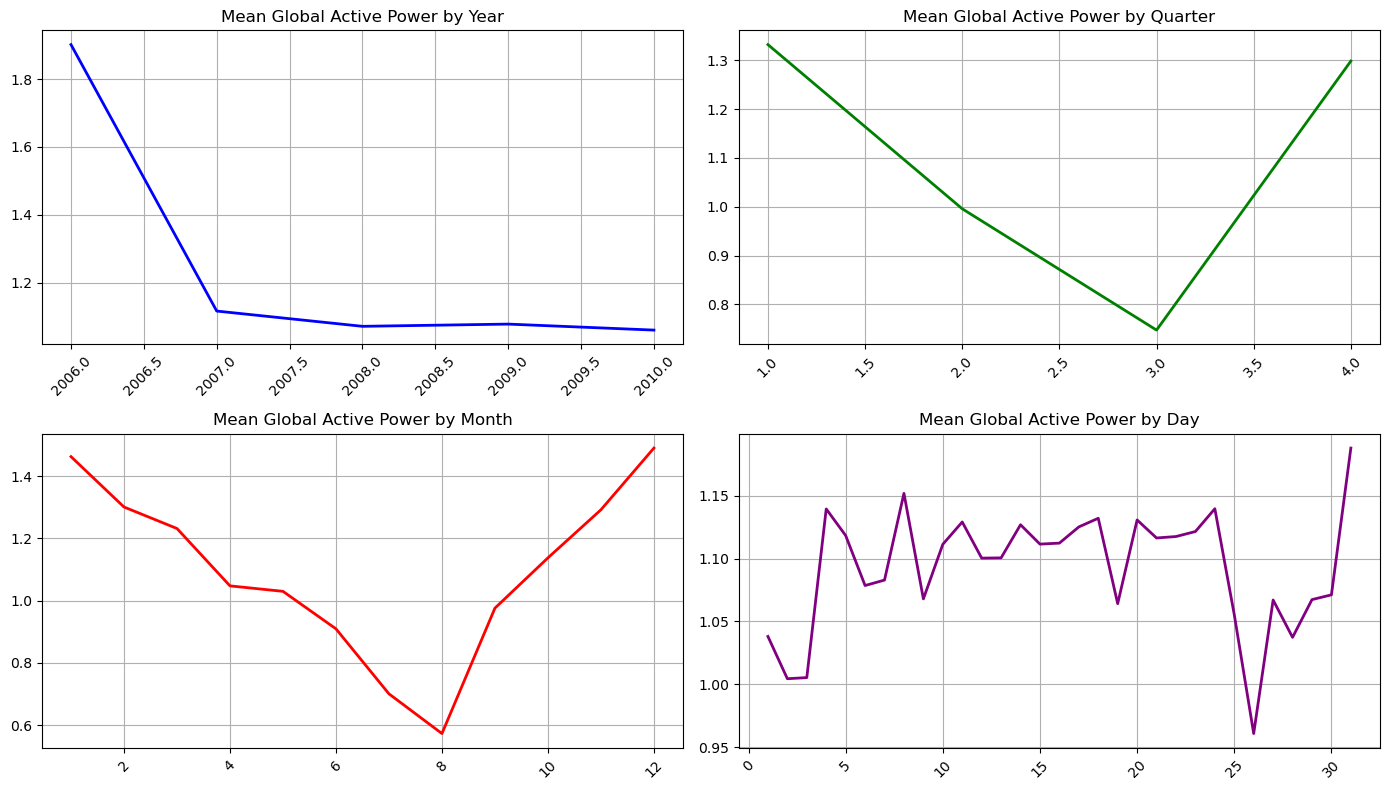

In [25]:
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
df.groupby('year')['Global_active_power'].mean().dropna().plot(linewidth=2, color='b')
plt.xlabel('')
plt.xticks(rotation=45)
plt.grid(True)
plt.title('Mean Global Active Power by Year')

plt.subplot(2, 2, 2)
df.groupby('quarter')['Global_active_power'].mean().dropna().plot(linewidth=2, color='g')
plt.xlabel('')
plt.xticks(rotation=45)
plt.grid(True)
plt.title('Mean Global Active Power by Quarter')

plt.subplot(2, 2, 3)
df.groupby('month')['Global_active_power'].mean().dropna().plot(linewidth=2, color='r')
plt.xlabel('')
plt.xticks(rotation=45)
plt.grid(True)
plt.title('Mean Global Active Power by Month')

plt.subplot(2, 2, 4)
df.groupby('day')['Global_active_power'].mean().dropna().plot(linewidth=2, color='purple')
plt.xlabel('')
plt.xticks(rotation=45)
plt.grid(True)
plt.title('Mean Global Active Power by Day')

plt.tight_layout()
plt.show()


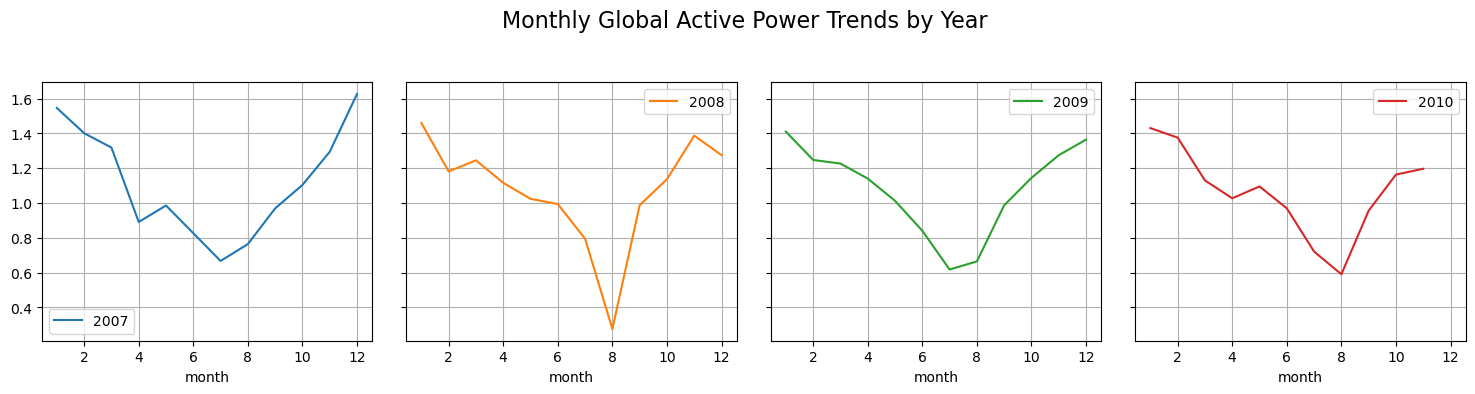

In [26]:
pivot_table = pd.pivot_table(
    df.loc[df['year'] != 2006], 
    values="Global_active_power", 
    columns="year", 
    index="month"
)

pivot_table.plot(
    subplots=True, 
    figsize=(15, 10), 
    layout=(3, 4),  
    sharey=True,
    grid=True  
)

plt.suptitle("Monthly Global Active Power Trends by Year", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()


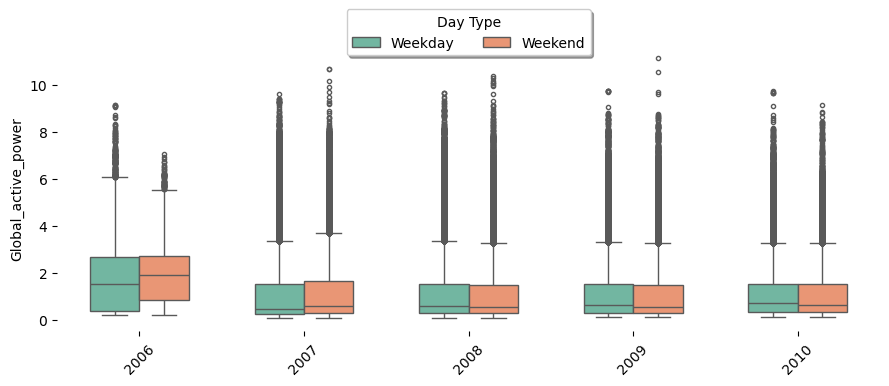

In [27]:
df['weekday'] = df['date_time'].dt.weekday
dic = {0: 'Weekend', 1: 'Weekday', 2: 'Weekday', 3: 'Weekday', 4: 'Weekday', 5: 'Weekday', 6: 'Weekend'}
df['Day'] = df['weekday'].map(dic)

# Create figure
plt.figure(figsize=(9, 4))

# Boxplot
sns.boxplot(
    x='year', 
    y='Global_active_power', 
    hue='Day', 
    width=0.6, 
    fliersize=3, 
    data=df, 
    palette="Set2"
)

# Adjust legend
plt.legend(title="Day Type", loc='upper center', bbox_to_anchor=(0.5, 1.15), shadow=True, ncol=2)

# Remove borders
sns.despine(left=True, bottom=True)

# Improve aesthetics
plt.xlabel('')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


### MODELS


In [68]:
dataset = df.Global_active_power.values #numpy.ndarray
dataset = dataset.astype('float32')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [69]:
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [70]:
look_back = 30
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

In [71]:
Y_test.shape

(409825,)

In [25]:
from keras.layers import SimpleRNN

### Vanilla RNN Model

In [33]:
model_rnn = Sequential()
model_rnn.add(SimpleRNN(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model_rnn.add(Dropout(0.2))
model_rnn.add(Dense(1))


In [34]:
model_rnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 100)                 │          10,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,301 (40.24 KB)

 Trainable params: 10,301 (40.24 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# Compile with Adam optimizer
model_rnn.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

# Train the model
history_rnn = model_rnn.fit(X_train, Y_train, epochs=20, batch_size=128, validation_data=(X_test, Y_test), 
                            callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

Epoch 1/20
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 254s 20ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 4.0588e-04 - val_mean_squared_error: 4.0588e-04
Epoch 2/20
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 264s 20ms/step - loss: 8.7274e-04 - mean_squared_error: 8.7274e-04 - val_loss: 4.0185e-04 - val_mean_squared_error: 4.0185e-04
Epoch 3/20
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 251s 20ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 4.0248e-04 - val_mean_squared_error: 4.0248e-04
Epoch 4/20
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 264s 20ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 3.9930e-04 - val_mean_squared_error: 3.9930e-04
Epoch 5/20
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 262s 20ms/step - loss: 8.3440e-04 - mean_squared_error: 8.3440e-04 - val_loss: 4.0137e-04 - val_mean_squared_error: 4.0137e-04
Epoch 6/20
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 234s 18ms/step - loss: 8.4826e-04 - mean_squared_error: 8.4826e-04 - val_loss: 4.0349e-04 - val_mean_squared_error: 4.0349e-0

In [36]:
train_predict_rnn = model_rnn.predict(X_train)
test_predict_rnn = model_rnn.predict(X_test)

train_predict_rnn = scaler.inverse_transform(train_predict_rnn)
Y_train_rnn = scaler.inverse_transform([Y_train])
test_predict_rnn = scaler.inverse_transform(test_predict_rnn)
Y_test_rnn = scaler.inverse_transform([Y_test])

train_mae_rnn = mean_absolute_error(Y_train_rnn[0], train_predict_rnn[:,0])
train_rmse_rnn = np.sqrt(mean_squared_error(Y_train_rnn[0], train_predict_rnn[:,0]))

test_mae_rnn = mean_absolute_error(Y_test_rnn[0], test_predict_rnn[:,0])
test_rmse_rnn = np.sqrt(mean_squared_error(Y_test_rnn[0], test_predict_rnn[:,0]))

print('RNN Train Mean Absolute Error:', train_mae_rnn)
print('RNN Train Root Mean Squared Error:', train_rmse_rnn)
print('RNN Test Mean Absolute Error:', test_mae_rnn)
print('RNN Test Root Mean Squared Error:', test_rmse_rnn)


51232/51232 ━━━━━━━━━━━━━━━━━━━━ 188s 4ms/step
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 50s 4ms/step
RNN Train Mean Absolute Error: 0.09251858250626455
RNN Train Root Mean Squared Error: 0.27940541240967637
RNN Test Mean Absolute Error: 0.07670941645644
RNN Test Root Mean Squared Error: 0.22250614928482165


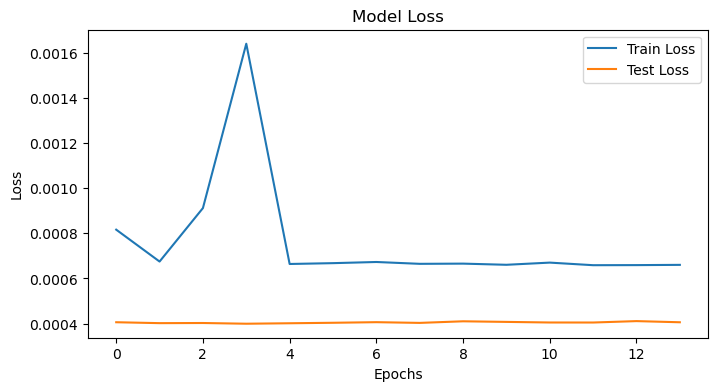

In [37]:
plt.figure(figsize=(8,4))  
plt.plot(history_rnn.history['loss'], label='Train Loss')  
plt.plot(history_rnn.history['val_loss'], label='Test Loss')  
plt.title('Model Loss') 
plt.ylabel('Loss') 
plt.xlabel('Epochs') 
plt.legend(loc='upper right') 
plt.show()  


### Stacked RNN Model

In [38]:
model_rnn_stacked = Sequential()
model_rnn_stacked.add(SimpleRNN(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_rnn_stacked.add(Dropout(0.2))
model_rnn_stacked.add(SimpleRNN(50))
model_rnn_stacked.add(Dropout(0.2))
model_rnn_stacked.add(Dense(1))


In [39]:
# Model summary
model_rnn_stacked.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)             │ (None, 30, 100)             │          10,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 50)                  │           7,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,801 (69.54 KB)

 Trainable params: 17,801 (69.54 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# Compile with RMSprop optimizer
model_rnn_stacked.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mean_squared_error'])

# Train the model
history_rnn_stacked = model_rnn_stacked.fit(X_train, Y_train, epochs=20, batch_size=128, validation_data=(X_test, Y_test), 
                                            callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

Epoch 1/20
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 438s 34ms/step - loss: 8.6545e-04 - mean_squared_error: 8.6545e-04 - val_loss: 4.0623e-04 - val_mean_squared_error: 4.0623e-04
Epoch 2/20
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 445s 34ms/step - loss: 8.5961e-04 - mean_squared_error: 8.5961e-04 - val_loss: 4.0382e-04 - val_mean_squared_error: 4.0382e-04
Epoch 3/20
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 436s 34ms/step - loss: 8.5930e-04 - mean_squared_error: 8.5930e-04 - val_loss: 4.0594e-04 - val_mean_squared_error: 4.0594e-04
Epoch 4/20
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 446s 35ms/step - loss: 8.5937e-04 - mean_squared_error: 8.5937e-04 - val_loss: 4.0567e-04 - val_mean_squared_error: 4.0567e-04
Epoch 5/20
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 523s 36ms/step - loss: 8.6116e-04 - mean_squared_error: 8.6116e-04 - val_loss: 4.0472e-04 - val_mean_squared_error: 4.0472e-04
Epoch 6/20
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 445s 35ms/step - loss: 8.6427e-04 - mean_squared_error: 8.6427e-04 - val_loss: 4.0780e-04 - val_mean_

In [43]:
train_predict_rnn_stacked = model_rnn_stacked.predict(X_train)
test_predict_rnn_stacked = model_rnn_stacked.predict(X_test)

train_predict_rnn_stacked = scaler.inverse_transform(train_predict_rnn_stacked)
Y_train_rnn_stacked = scaler.inverse_transform([Y_train])
test_predict_rnn_stacked = scaler.inverse_transform(test_predict_rnn_stacked)
Y_test_rnn_stacked = scaler.inverse_transform([Y_test])

train_mae_rnn_stacked = mean_absolute_error(Y_train_rnn_stacked[0], train_predict_rnn_stacked[:,0])
train_rmse_rnn_stacked = np.sqrt(mean_squared_error(Y_train_rnn_stacked[0], train_predict_rnn_stacked[:,0]))

test_mae_rnn_stacked = mean_absolute_error(Y_test_rnn_stacked[0], test_predict_rnn_stacked[:,0])
test_rmse_rnn_stacked = np.sqrt(mean_squared_error(Y_test_rnn_stacked[0], test_predict_rnn_stacked[:,0]))

print('Stacked RNN Train Mean Absolute Error:', train_mae_rnn_stacked)
print('Stacked RNN Train Root Mean Squared Error:', train_rmse_rnn_stacked)
print('Stacked RNN Test Mean Absolute Error:', test_mae_rnn_stacked)
print('Stacked RNN Test Root Mean Squared Error:', test_rmse_rnn_stacked)


51232/51232 ━━━━━━━━━━━━━━━━━━━━ 281s 5ms/step
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 70s 5ms/step
Stacked RNN Train Mean Absolute Error: 0.09883286183355543
Stacked RNN Train Root Mean Squared Error: 0.2767180643039309
Stacked RNN Test Mean Absolute Error: 0.08219772757038549
Stacked RNN Test Root Mean Squared Error: 0.22298995703966307


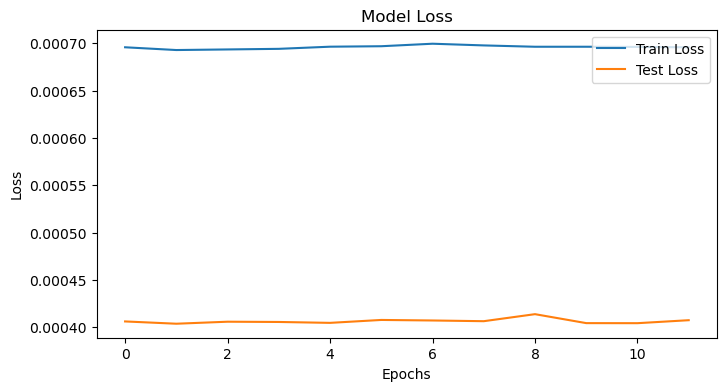

In [44]:
plt.figure(figsize=(8,4))  
plt.plot(history_rnn_stacked.history['loss'], label='Train Loss')  
plt.plot(history_rnn_stacked.history['val_loss'], label='Test Loss') 
plt.title('Model Loss')  
plt.ylabel('Loss')  
plt.xlabel('Epochs')  
plt.legend(loc='upper right')  
plt.show()  


### GRU Model

In [45]:
from keras.layers import GRU


In [46]:
model_gru = Sequential()
model_gru.add(GRU(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model_gru.add(Dropout(0.2))
model_gru.add(Dense(1))


In [47]:
# Model summary
model_gru.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 100)                 │          30,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,001 (121.10 KB)

 Trainable params: 31,001 (121.10 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

# Train the model
history_gru = model_gru.fit(X_train, Y_train, epochs=20, batch_size=128, validation_data=(X_test, Y_test), 
                            callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)


Epoch 1/20
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 680s 53ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 4.0440e-04 - val_mean_squared_error: 4.0440e-04
Epoch 2/20
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 783s 61ms/step - loss: 8.2687e-04 - mean_squared_error: 8.2687e-04 - val_loss: 4.0401e-04 - val_mean_squared_error: 4.0401e-04
Epoch 3/20
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 770s 58ms/step - loss: 8.1294e-04 - mean_squared_error: 8.1294e-04 - val_loss: 3.9552e-04 - val_mean_squared_error: 3.9552e-04
Epoch 4/20
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 955s 75ms/step - loss: 8.0602e-04 - mean_squared_error: 8.0602e-04 - val_loss: 3.9319e-04 - val_mean_squared_error: 3.9319e-04
Epoch 5/20
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 993s 78ms/step - loss: 7.9889e-04 - mean_squared_error: 7.9889e-04 - val_loss: 3.9724e-04 - val_mean_squared_error: 3.9724e-04
Epoch 6/20
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 998s 78ms/step - loss: 7.8568e-04 - mean_squared_error: 7.8568e-04 - val_loss: 3.9129e-04 - val_mean_squared_

In [49]:
train_predict_gru = model_gru.predict(X_train)
test_predict_gru = model_gru.predict(X_test)

train_predict_gru = scaler.inverse_transform(train_predict_gru)
Y_train_gru = scaler.inverse_transform([Y_train])
test_predict_gru = scaler.inverse_transform(test_predict_gru)
Y_test_gru = scaler.inverse_transform([Y_test])

train_mae_gru = mean_absolute_error(Y_train_gru[0], train_predict_gru[:, 0])
train_rmse_gru = np.sqrt(mean_squared_error(Y_train_gru[0], train_predict_gru[:, 0]))

test_mae_gru = mean_absolute_error(Y_test_gru[0], test_predict_gru[:, 0])
test_rmse_gru = np.sqrt(mean_squared_error(Y_test_gru[0], test_predict_gru[:, 0]))

print('GRU Train Mean Absolute Error:', train_mae_gru)
print('GRU Train Root Mean Squared Error:', train_rmse_gru)
print('GRU Test Mean Absolute Error:', test_mae_gru)
print('GRU Test Root Mean Squared Error:', test_rmse_gru)


51232/51232 ━━━━━━━━━━━━━━━━━━━━ 553s 11ms/step
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 138s 11ms/step
GRU Train Mean Absolute Error: 0.10717949129102262
GRU Train Root Mean Squared Error: 0.25929344021734047
GRU Test Mean Absolute Error: 0.09193252666141871
GRU Test Root Mean Squared Error: 0.2130973134357317


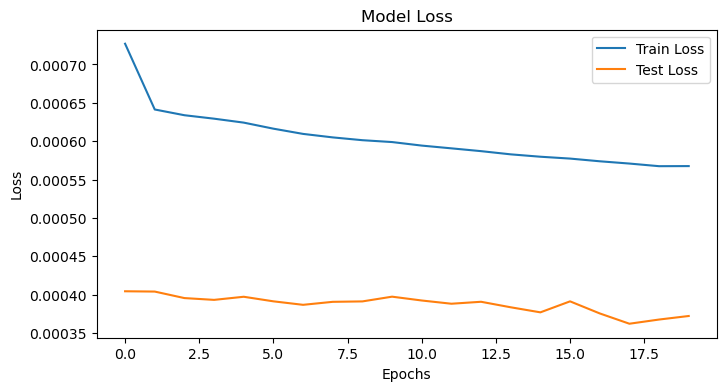

In [50]:
plt.figure(figsize=(8,4))  # Set the figure size
plt.plot(history_gru.history['loss'], label='Train Loss')  # Plot train loss
plt.plot(history_gru.history['val_loss'], label='Test Loss')  # Plot validation loss
plt.title('Model Loss')  # Title of the plot
plt.ylabel('Loss')  # Label for y-axis
plt.xlabel('Epochs')  # Label for x-axis
plt.legend(loc='upper right')  # Position the legend in the upper right
plt.show()  # Display the plot


In [70]:
X_train.shape

(1639394, 30, 1)

### Simple LSTM

In [51]:
model_lstm = Sequential()
model_lstm.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1))

In [52]:
model_lstm.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                       │ (None, 100)                 │          52,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,501 (205.08 KB)

 Trainable params: 52,501 (205.08 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
model_lstm.compile(loss='mean_squared_error', optimizer='adam',metrics=['mean_squared_error'])

history_lstm = model_lstm.fit(X_train, Y_train, epochs=20, batch_size=128, validation_data=(X_test, Y_test), 
                              callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)


Epoch 1/20
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 98s 7ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 4.2596e-04 - val_mean_squared_error: 4.2596e-04
Epoch 2/20
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 133s 7ms/step - loss: 8.2626e-04 - mean_squared_error: 8.2626e-04 - val_loss: 4.2873e-04 - val_mean_squared_error: 4.2873e-04
Epoch 3/20
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 91s 7ms/step - loss: 8.2171e-04 - mean_squared_error: 8.2171e-04 - val_loss: 3.9637e-04 - val_mean_squared_error: 3.9637e-04
Epoch 4/20
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 94s 7ms/step - loss: 8.1527e-04 - mean_squared_error: 8.1527e-04 - val_loss: 3.9734e-04 - val_mean_squared_error: 3.9734e-04
Epoch 5/20
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 95s 7ms/step - loss: 8.0566e-04 - mean_squared_error: 8.0566e-04 - val_loss: 3.9949e-04 - val_mean_squared_error: 3.9949e-04
Epoch 6/20
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 136s 7ms/step - loss: 8.0514e-04 - mean_squared_error: 8.0514e-04 - val_loss: 3.9840e-04 - val_mean_squared_error: 3.9

In [54]:
train_predict_lstm = model_lstm.predict(X_train)
test_predict_lstm = model_lstm.predict(X_test)

train_predict_lstm = scaler.inverse_transform(train_predict_lstm)
Y_train_lstm = scaler.inverse_transform([Y_train])
test_predict_lstm = scaler.inverse_transform(test_predict_lstm)
Y_test_lstm = scaler.inverse_transform([Y_test])

train_mae_lstm = mean_absolute_error(Y_train_lstm[0], train_predict_lstm[:, 0])
train_rmse_lstm = np.sqrt(mean_squared_error(Y_train_lstm[0], train_predict_lstm[:, 0]))

test_mae_lstm = mean_absolute_error(Y_test_lstm[0], test_predict_lstm[:, 0])
test_rmse_lstm = np.sqrt(mean_squared_error(Y_test_lstm[0], test_predict_lstm[:, 0]))

print('LSTM Train Mean Absolute Error:', train_mae_lstm)
print('LSTM Train Root Mean Squared Error:', train_rmse_lstm)
print('LSTM Test Mean Absolute Error:', test_mae_lstm)
print('LSTM Test Root Mean Squared Error:', test_rmse_lstm)


51232/51232 ━━━━━━━━━━━━━━━━━━━━ 122s 2ms/step
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step
LSTM Train Mean Absolute Error: 0.09302153765648566
LSTM Train Root Mean Squared Error: 0.2668865141191325
LSTM Test Mean Absolute Error: 0.07708328705788517
LSTM Test Root Mean Squared Error: 0.21707413183395508


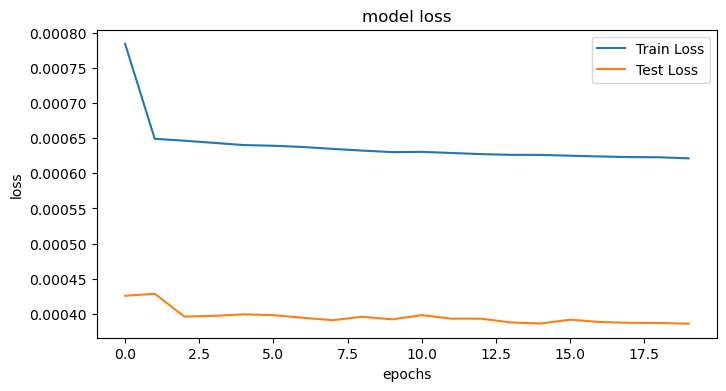

In [58]:
plt.figure(figsize=(8,4))
plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

### Stacked LSTM Model

In [80]:
model_lstm_1 = Sequential()
model_lstm_1.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm_1.add(Dropout(0.2))
model_lstm_1.add(LSTM(64, return_sequences=False))
model_lstm_1.add(Dense(1))

# Model summary
model_lstm_1.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 1, 128)              │          81,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 130,881 (511.25 KB)

 Trainable params: 130,881 (511.25 KB)

 Non-trainable params: 0 (0.00 B)

In [82]:
from keras.optimizers import Adam

model_lstm_1.compile(loss='mse', optimizer=Adam(learning_rate=0.0005), metrics=['mae'])

history_lstm_1 = model_lstm_1.fit(
    X_train, Y_train, 
    epochs=20, batch_size=70, 
    validation_data=(X_test, Y_test), 
    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], 
    verbose=1, shuffle=False
)

Epoch 1/20
23420/23420 ━━━━━━━━━━━━━━━━━━━━ 153s 6ms/step - loss: 0.0014 - mae: 0.0172 - val_loss: 4.0764e-04 - val_mae: 0.0077
Epoch 2/20
23420/23420 ━━━━━━━━━━━━━━━━━━━━ 200s 6ms/step - loss: 8.1886e-04 - mae: 0.0130 - val_loss: 4.0665e-04 - val_mae: 0.0075
Epoch 3/20
23420/23420 ━━━━━━━━━━━━━━━━━━━━ 146s 6ms/step - loss: 8.0223e-04 - mae: 0.0127 - val_loss: 4.0228e-04 - val_mae: 0.0075
Epoch 4/20
23420/23420 ━━━━━━━━━━━━━━━━━━━━ 149s 6ms/step - loss: 7.9227e-04 - mae: 0.0125 - val_loss: 3.9746e-04 - val_mae: 0.0073
Epoch 5/20
23420/23420 ━━━━━━━━━━━━━━━━━━━━ 202s 6ms/step - loss: 7.8721e-04 - mae: 0.0123 - val_loss: 3.9609e-04 - val_mae: 0.0071
Epoch 6/20
23420/23420 ━━━━━━━━━━━━━━━━━━━━ 155s 7ms/step - loss: 7.8163e-04 - mae: 0.0122 - val_loss: 3.9477e-04 - val_mae: 0.0072
Epoch 7/20
23420/23420 ━━━━━━━━━━━━━━━━━━━━ 200s 7ms/step - loss: 7.7700e-04 - mae: 0.0121 - val_loss: 3.9690e-04 - val_mae: 0.0073
Epoch 8/20
23420/23420 ━━━━━━━━━━━━━━━━━━━━ 198s 6ms/step - loss: 7.7532e-04 - m

In [83]:
train_predict_lstm_1 = model_lstm_1.predict(X_train)
test_predict_lstm_1 = model_lstm_1.predict(X_test)

train_predict_lstm_1 = scaler.inverse_transform(train_predict_lstm_1)
Y_train_lstm_1 = scaler.inverse_transform([Y_train])
test_predict_lstm_1 = scaler.inverse_transform(test_predict_lstm_1)
Y_test_lstm_1 = scaler.inverse_transform([Y_test])

train_mae_lstm_1 = mean_absolute_error(Y_train_lstm_1[0], train_predict_lstm_1[:, 0])
train_rmse_lstm_1 = np.sqrt(mean_squared_error(Y_train_lstm_1[0], train_predict_lstm_1[:, 0]))

test_mae_lstm_1 = mean_absolute_error(Y_test_lstm_1[0], test_predict_lstm_1[:, 0])
test_rmse_lstm_1 = np.sqrt(mean_squared_error(Y_test_lstm_1[0], test_predict_lstm_1[:, 0]))

print('LSTM_1 Train Mean Absolute Error:', train_mae_lstm_1)
print('LSTM_1 Train Root Mean Squared Error:', train_rmse_lstm_1)
print('LSTM_1 Test Mean Absolute Error:', test_mae_lstm_1)
print('LSTM_1 Test Root Mean Squared Error:', test_rmse_lstm_1)


51232/51232 ━━━━━━━━━━━━━━━━━━━━ 157s 3ms/step
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step
LSTM_1 Train Mean Absolute Error: 0.09574066956232577
LSTM_1 Train Root Mean Squared Error: 0.2654706269154954
LSTM_1 Test Mean Absolute Error: 0.08077528785256861
LSTM_1 Test Root Mean Squared Error: 0.21687923049104857


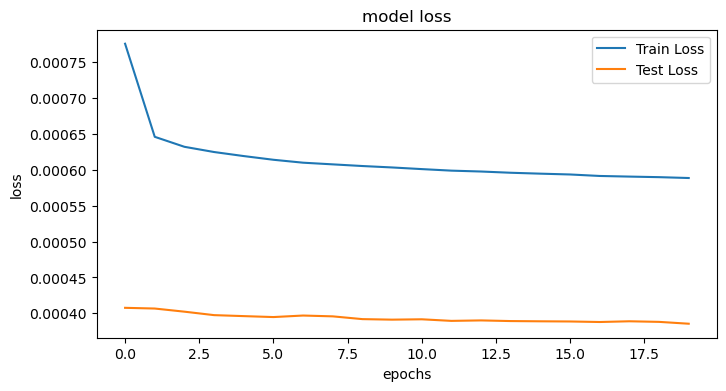

In [84]:
plt.figure(figsize=(8,4))
plt.plot(history_lstm_1.history['loss'], label='Train Loss')
plt.plot(history_lstm_1.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

### Bi-LSTM Model

In [26]:
from keras.optimizers import Adam

model_bi_lstm = Sequential()
model_bi_lstm.add(Bidirectional(LSTM(256, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))  # Increased LSTM units
model_bi_lstm.add(BatchNormalization()) 
model_bi_lstm.add(Dropout(0.4)) 
model_bi_lstm.add(Bidirectional(LSTM(128))) 
model_bi_lstm.add(Dense(64, activation='relu'))  
model_bi_lstm.add(Dense(1))

model_bi_lstm.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 1, 512)              │         587,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1, 512)              │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 512)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 256)                 │         656,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,262,721 (4.82 MB)

 Trainable params: 1,261,697 (4.81 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [28]:
from keras.optimizers import Nadam

model_bi_lstm.compile(loss='mse', optimizer=Nadam(learning_rate=0.001), metrics=['mae'])

history_bi_lstm = model_bi_lstm.fit(
    X_train, Y_train, 
    epochs=25, batch_size=100, 
    validation_data=(X_test, Y_test), 
    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], 
    verbose=1, shuffle=False
)


Epoch 1/25
16394/16394 ━━━━━━━━━━━━━━━━━━━━ 465s 27ms/step - loss: 0.0029 - mae: 0.0338 - val_loss: 0.0012 - val_mae: 0.0250
Epoch 2/25
16394/16394 ━━━━━━━━━━━━━━━━━━━━ 507s 28ms/step - loss: 0.0010 - mae: 0.0177 - val_loss: 0.0011 - val_mae: 0.0243
Epoch 3/25
16394/16394 ━━━━━━━━━━━━━━━━━━━━ 508s 28ms/step - loss: 9.3573e-04 - mae: 0.0163 - val_loss: 9.2159e-04 - val_mae: 0.0219
Epoch 4/25
16394/16394 ━━━━━━━━━━━━━━━━━━━━ 461s 28ms/step - loss: 8.7185e-04 - mae: 0.0155 - val_loss: 8.4097e-04 - val_mae: 0.0208
Epoch 5/25
16394/16394 ━━━━━━━━━━━━━━━━━━━━ 464s 28ms/step - loss: 8.3672e-04 - mae: 0.0150 - val_loss: 9.0434e-04 - val_mae: 0.0221
Epoch 6/25
16394/16394 ━━━━━━━━━━━━━━━━━━━━ 506s 29ms/step - loss: 8.1511e-04 - mae: 0.0147 - val_loss: 7.6073e-04 - val_mae: 0.0183
Epoch 7/25
16394/16394 ━━━━━━━━━━━━━━━━━━━━ 462s 28ms/step - loss: 7.9194e-04 - mae: 0.0144 - val_loss: 7.3643e-04 - val_mae: 0.0183
Epoch 8/25
16394/16394 ━━━━━━━━━━━━━━━━━━━━ 467s 28ms/step - loss: 7.7656e-04 - mae: 

In [29]:
train_predict_bi_lstm = model_bi_lstm.predict(X_train)
test_predict_bi_lstm = model_bi_lstm.predict(X_test)

train_predict_bi_lstm = scaler.inverse_transform(train_predict_bi_lstm)
Y_train_bi_lstm = scaler.inverse_transform([Y_train])
test_predict_bi_lstm = scaler.inverse_transform(test_predict_bi_lstm)
Y_test_bi_lstm = scaler.inverse_transform([Y_test])

train_mae_bi_lstm = mean_absolute_error(Y_train_bi_lstm[0], train_predict_bi_lstm[:, 0])
train_rmse_bi_lstm = np.sqrt(mean_squared_error(Y_train_bi_lstm[0], train_predict_bi_lstm[:, 0]))

test_mae_bi_lstm = mean_absolute_error(Y_test_bi_lstm[0], test_predict_bi_lstm[:, 0])
test_rmse_bi_lstm = np.sqrt(mean_squared_error(Y_test_bi_lstm[0], test_predict_bi_lstm[:, 0]))

print('Bi-LSTM Train Mean Absolute Error:', train_mae_bi_lstm)
print('Bi-LSTM Train Root Mean Squared Error:', train_rmse_bi_lstm)
print('Bi-LSTM Test Mean Absolute Error:', test_mae_bi_lstm)
print('Bi-LSTM Test Root Mean Squared Error:', test_rmse_bi_lstm)


51232/51232 ━━━━━━━━━━━━━━━━━━━━ 286s 6ms/step
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 84s 7ms/step
Bi-LSTM Train Mean Absolute Error: 0.18071297087183597
Bi-LSTM Train Root Mean Squared Error: 0.31266991942146005
Bi-LSTM Test Mean Absolute Error: 0.16470195514507935
Bi-LSTM Test Root Mean Squared Error: 0.2638173422080258


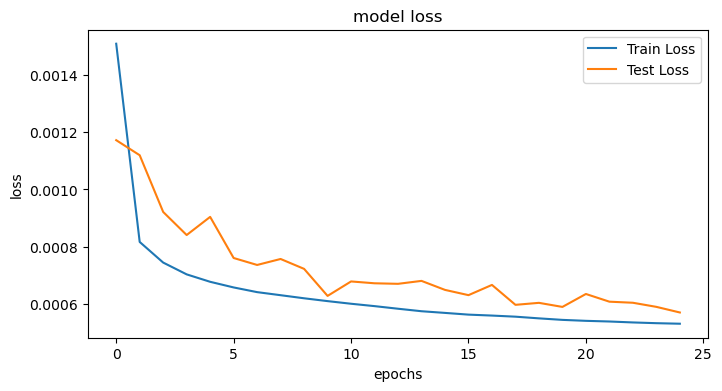

In [30]:
plt.figure(figsize=(8,4))
plt.plot(history_bi_lstm.history['loss'], label='Train Loss')
plt.plot(history_bi_lstm.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

### Refined LSTM Model

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.optimizers import AdamW

model_best_lstm = Sequential()

model_best_lstm.add(Bidirectional(LSTM(128, return_sequences=True, activation='tanh'), 
                                  input_shape=(X_train.shape[1], X_train.shape[2])))
model_best_lstm.add(BatchNormalization())  
model_best_lstm.add(Dropout(0.2)) 

model_best_lstm.add(Bidirectional(LSTM(64, return_sequences=True, activation='tanh')))
model_best_lstm.add(BatchNormalization())  
model_best_lstm.add(Dropout(0.2))

model_best_lstm.add(Bidirectional(LSTM(32, activation='tanh')))
model_best_lstm.add(Dropout(0.15))  

model_best_lstm.add(Dense(64, activation='relu'))
model_best_lstm.add(Dropout(0.15))
model_best_lstm.add(Dense(32, activation='relu'))
model_best_lstm.add(Dropout(0.1))

model_best_lstm.add(Dense(1))

model_best_lstm.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_10 (Bidirectional)     │ (None, 1, 256)              │         162,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 1, 256)              │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 1, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_11 (Bidirectional)     │ (None, 1, 128)              │         164,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 1, 128)              │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_12 (Bidirectional)     │ (None, 64)                  │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 376,193 (1.44 MB)

 Trainable params: 375,425 (1.43 MB)

 Non-trainable params: 768 (3.00 KB)

In [44]:
from tensorflow.keras.callbacks import EarlyStopping

optimizer = AdamW(learning_rate=0.0005, weight_decay=1e-6) 
model_best_lstm.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mse'])

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

history_best_lstm = model_best_lstm.fit(
    X_train, Y_train, 
    epochs=20,  
    batch_size=128,  
    validation_data=(X_test, Y_test), 
    callbacks=[early_stopping], 
    verbose=1, shuffle=True  
)


Epoch 1/20
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 303s 22ms/step - loss: 0.0014 - mae: 0.0208 - mse: 0.0014 - val_loss: 4.7077e-04 - val_mae: 0.0133 - val_mse: 4.7077e-04
Epoch 2/20
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 282s 22ms/step - loss: 7.8671e-04 - mae: 0.0147 - mse: 7.8671e-04 - val_loss: 4.3849e-04 - val_mae: 0.0107 - val_mse: 4.3849e-04
Epoch 3/20
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 296s 23ms/step - loss: 7.3437e-04 - mae: 0.0138 - mse: 7.3437e-04 - val_loss: 4.4587e-04 - val_mae: 0.0106 - val_mse: 4.4587e-04
Epoch 4/20
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 282s 22ms/step - loss: 7.0620e-04 - mae: 0.0135 - mse: 7.0620e-04 - val_loss: 4.4311e-04 - val_mae: 0.0102 - val_mse: 4.4311e-04
Epoch 5/20
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 336s 23ms/step - loss: 6.9354e-04 - mae: 0.0132 - mse: 6.9354e-04 - val_loss: 4.0014e-04 - val_mae: 0.0104 - val_mse: 4.0014e-04
Epoch 6/20
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 305s 22ms/step - loss: 6.8117e-04 - mae: 0.0131 - mse: 6.8117e-04 - val_loss: 4.0856e-04 - val_mae:

In [45]:
train_predict_best_lstm = model_best_lstm.predict(X_train)
test_predict_best_lstm = model_best_lstm.predict(X_test)

train_predict_best_lstm = scaler.inverse_transform(train_predict_best_lstm)
Y_train_best_lstm = scaler.inverse_transform([Y_train])
test_predict_best_lstm = scaler.inverse_transform(test_predict_best_lstm)
Y_test_best_lstm = scaler.inverse_transform([Y_test])

train_mae_best_lstm = mean_absolute_error(Y_train_best_lstm[0], train_predict_best_lstm[:, 0])
train_rmse_best_lstm = np.sqrt(mean_squared_error(Y_train_best_lstm[0], train_predict_best_lstm[:, 0]))

test_mae_best_lstm = mean_absolute_error(Y_test_best_lstm[0], test_predict_best_lstm[:, 0])
test_rmse_best_lstm = np.sqrt(mean_squared_error(Y_test_best_lstm[0], test_predict_best_lstm[:, 0]))

print('Best LSTM Train Mean Absolute Error:', train_mae_best_lstm)
print('Best LSTM Train Root Mean Squared Error:', train_rmse_best_lstm)
print('Best LSTM Test Mean Absolute Error:', test_mae_best_lstm)
print('Best LSTM Test Root Mean Squared Error:', test_rmse_best_lstm)


51232/51232 ━━━━━━━━━━━━━━━━━━━━ 221s 4ms/step
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 58s 5ms/step
Best LSTM Train Mean Absolute Error: 0.11016092801906079
Best LSTM Train Root Mean Squared Error: 0.25529470222338885
Best LSTM Test Mean Absolute Error: 0.09028362263528324
Best LSTM Test Root Mean Squared Error: 0.20857092562517907


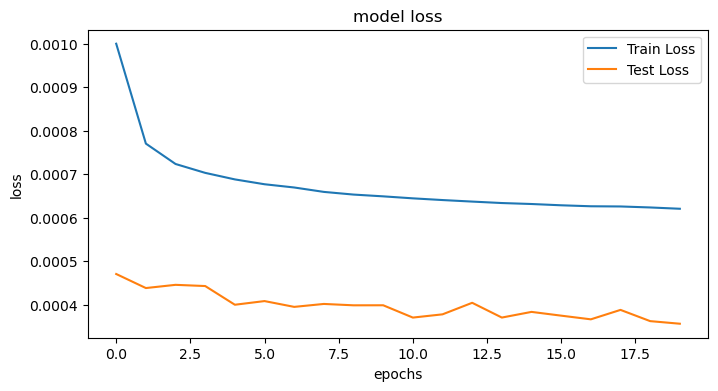

In [46]:
plt.figure(figsize=(8,4))
plt.plot(history_best_lstm.history['loss'], label='Train Loss')
plt.plot(history_best_lstm.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();